# Курс "Название"

---
# Семинар 6. Классификация сигналов в Keras.

<html>
  <head>
    <meta charset='utf-8'>
  </head>
  <body>
    <ul>
      <li><strong>1. Цифровая обработка сигналов (ЦОС)</strong>
      <ul>
        <li>1.1 Случайные сигналы</li>
      </ul>
      <ul>
        <li>1.2 Детерминированные сигналы</li>
      </ul>
      <ul>
        <li>1.3 Модуляция</li>
              <ul>
        <li>1.3.1 Амплитудная модуляция</li>   
      </ul>
            <ul>
        <li>1.3.2 Угловая модуляция</li>     
      </ul>
            <ul>
        <li>1.3.3 Частотная модуляция</li>   
      </ul>
            <ul>
        <li>1.3.4 Линейно-частотная модуляция</li>    
      </ul>
      </ul>
    </ul>
    <ul>
      <li><strong>2. Создание нейронной сети</strong>
      <ul>
        <li>2.1 Введение в Keras</li>
      </ul>
      <ul>
        <li>2.2 Подготовка базы данных</li>
      </ul>
    </ul>
    </ul>
  </body>
</html>

**Подгрузим необходимые библиотеки в проект**

In [1]:
import numpy as np
import random
from scipy.fftpack import fft, rfft, fftshift
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Input, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

import seaborn as sns
sns.set_style('darkgrid')

# **1. Цифровая обработка сигналов (ЦОС)**

## 1.1 Случайные сигналы

**Сигналы**

*Сигнал* - это физический процесс, параметры которого изменяются в соответствии с передаваемым сообщением. Сигналы бывают – *случайные* и *детерминированные*. 

**Случайным** сигналом называют функцию времени, значения которой заранее неизвестны и могут быть предсказаны лишь с некоторой *вероятностью*. К основным характеристикам случайных сигналов относятся:

* закон распределения (относительное время пребывания значения сигнала в определенном интервале),
* спектральное распределение мощности.


Случайные сигналы делятся на два класса: 
1) шумы - беспорядочные колебания, состоящие из набора разных частот и амплитуд, 

2) сигналы, несущие информацию, для обработки которых требуется прибегать к вероятностным методам. 

Случайные сигналы характеризуются **плотностью распределения вероятностей**. Плотность вероятности это один из способов задания распределения случайных величин.  Плотность вероятности - неотрицательная функция при любых значениях дискретного сигнала. Для аналоговых случайных сигналов интеграл от функции сигнала во всем диапазоне значений стремится к единице. Для дискретных случайных величин **не** существует функции плотности распределения вероятностей, т.к. дискретная случайная величина не является непрерывной функцией. Однако, математический аппарат позволяет вычислять приближенные значения функции.

Плотность вероятности случайного сигнала позволяет определить математические моменты разного порядка:

- **Математическое ожидание**: среднее значение последовательности случайных величин

$m = \frac{1}{N}\sum_{n=0}^{N-1}x(n)$

Под математическим ожиданием в теории сигналов зачастую понимают смещение сигнала по уровню относительно нуля (постоянная составляющая). 

В python для вычисления математического ожидания используется метод `mean()`

- **Дисперсия**: среднее значение квадратов разностей между значениями последовательности и её средним значением

$\sigma^2 = \frac{1}{N-1}\sum_{n=0}^{N-1}|x(n) - m|^{2}$ 

В литературе часто используется термин **среднеквадратическое отклонение**. Эта величина равна квадратному корню из дисперсии сигнала.

В python для вычисления дисперсии используется метод - `var()`, а для поиска среднеквадратического отклонения используется метод - `std()`.

**Python библиотека Random**

Python библиотека numpy содержит пакет **random**, который содержит набор функций математической статистики. 

Кроме того, в библиотеке scipy содержится пакет **stats*, который дополняет (и частично переопределяет) функционал пакета random. Приведем список основных функций из пакета random:

| **Function**      | **Description** |
| --- | --- | 
| `rand(d0, d1, ..., dn)`               | Равномерное распределение (возвращает N-мерный массив) |
| `randn(d0, d1, ..., dn)`              | Стандартное нормальное распределение (возвращает N-мерный массив) |
| `randint(low[, high, size, dtype])`   | Массив целочисленных значений в заданном диапазоне |
| `random([size])`                      | Равномерное распределение в интервале $[0.0, 1.0)$ |
| `shuffle(x)`                          | Перестановка элементов последовательности "на лету" |
| `permutation(x)`                      | Перестановка элементов массива или возврат их индексов |
| `normal([loc, scale, size])`          | Массив случайных чисел, распределенных по нормальному закону |
| `pareto(a[, size])`                   | Массив случайных чисел, распределенных по закону Парето |
| `poisson([lam, size])`                | Массив случайных чисел, распределенных по закону Пуассона  |
| `rayleigh([scale, size])`             | Массив случайных чисел, распределенных по Рэлеевскому закону |
| `seed([seed])`                        | Инициализация псевдослучайной величины |

____

В задачах цифровой обработки сигналов случайные процессы играют важную роль. С помощью случайных величин можно моделировать воздействие реальной среды на прохождение сигнала от источника к приёмнику данных. Зачастую, при прохождении сигнала через какое-то шумящее звено, к сигналу добавляется так называемый **белый шум**. Как правило, спектральная плотность такого шума равномерно (одинаково) распределена на всех частотах, а значения шума во временной области распределены нормально (Гауссовский закон распределения). Поскольку белый шум физически добавляется к амплитудам сигнала в выбранные отсчеты времени, он называется **аддитивный**. Таким образом, основной источник шумов носит название *аддитивный белый гауссовский шум* (AWGN - Additive white Gaussian noise). 

Стоит отметить, что термин *белый* связан с тем, что спектральные составляющие равномерно распределены по всему диапазону частот, поскольку частотные значения распределены равномерно, автокорреляционная функция (АКФ) белого шума в идеале стремится к **дельта-функции**. 

Приведем график белого шума во временной области, а также построим его АКФ. В качестве генератора белого шума воспользуемся функцией `randn()` из пакета *random*

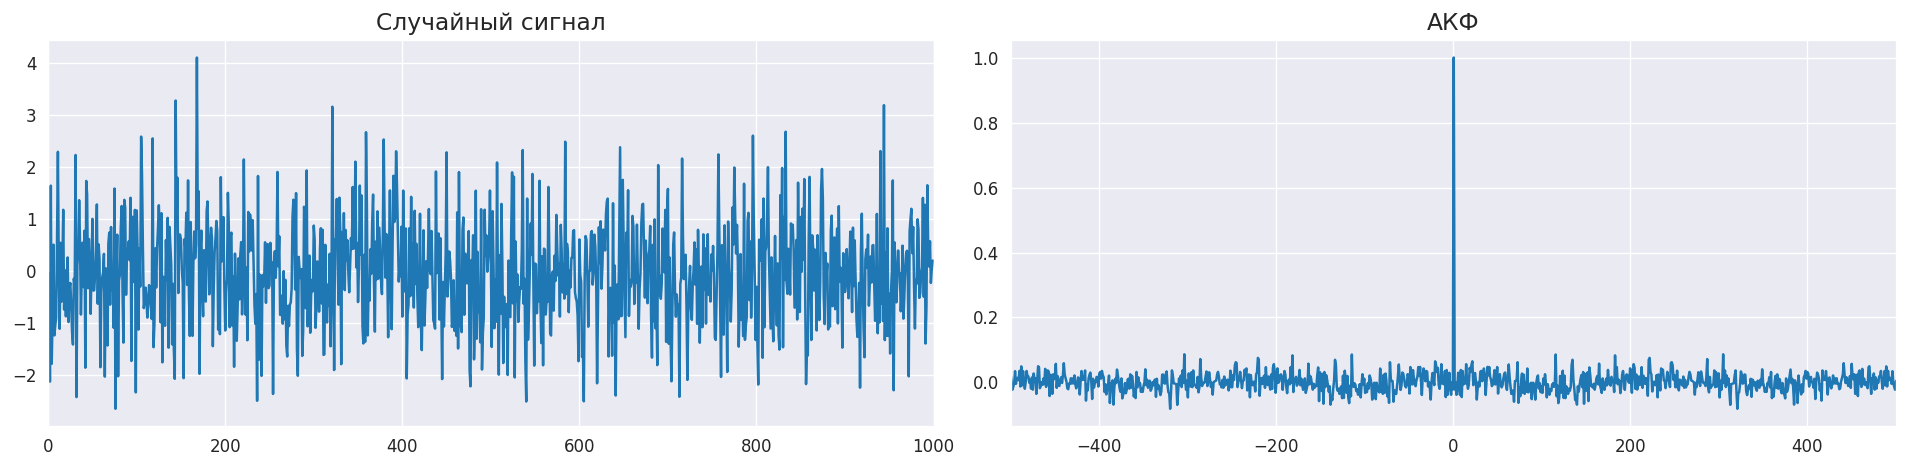

In [2]:
# Авто-корреляционная функция

def auto_corr(x):
    res = np.correlate(x, x, mode='same')
    return res / np.max(res)

N = 1000

np.random.seed(2)
dat = np.random.randn(N)

# АКФ
cfx = auto_corr(dat)

plt.figure(figsize=(16, 4), dpi=120)
plt.subplot(1, 2, 1)
plt.title('Случайный сигнал', fontsize=14)
plt.plot(dat)
plt.xlim([0, dat.size])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('АКФ', fontsize=14)
plt.plot(np.linspace(-N//2, N//2, N), cfx)
plt.xlim([-N//2, N//2])
plt.grid(True)
plt.tight_layout()

## 1.2 Детерминированные сигналы

**Детерминированные сигналы**

В мире существует множество сигналов различной формы, однако в задачах цифровой и аналоговой обработки часто используются известные сигналы - гармонической формы, модулированные (по амплитуде, частоте или фазе). Как известно, сигнал любой формы можно представить как совокупность гармонических сигналов разных частот и амплитуд (то есть набор спектральных отсчетов). Можно сказать, что чем сложнее сигнал - тем больше спектральных отсчетов требуется для его представления. В частности, для представления сигналов с резкими изменениями формы требуются высокие частоты спектра, а для "гладких" сигналов и медленно меняющихся процессов высокие частоты не требуются и не вносят вклад в результирующий сигнал (и его спектр).


**Гармонический сигнал**

Гармонический сигнал задается уравнением:  

$s(t) = A \cdot cos(2\pi ft +\phi)$, 

где *A* – амплитуда колебания, f - частота сигнала, φ – начальная фаза. 

Комплексная запись такого сигнала:

$s = A \cdot e^{j(2\pi ft +\phi)}$, 

где *j* - комплексная единица. Часто выражается как $j = \sqrt-1$

Ниже представлен график гармонического сигнала при различных параметрах значения частоты. Амплитуда = 1, начальная фаза = 0 (константы).

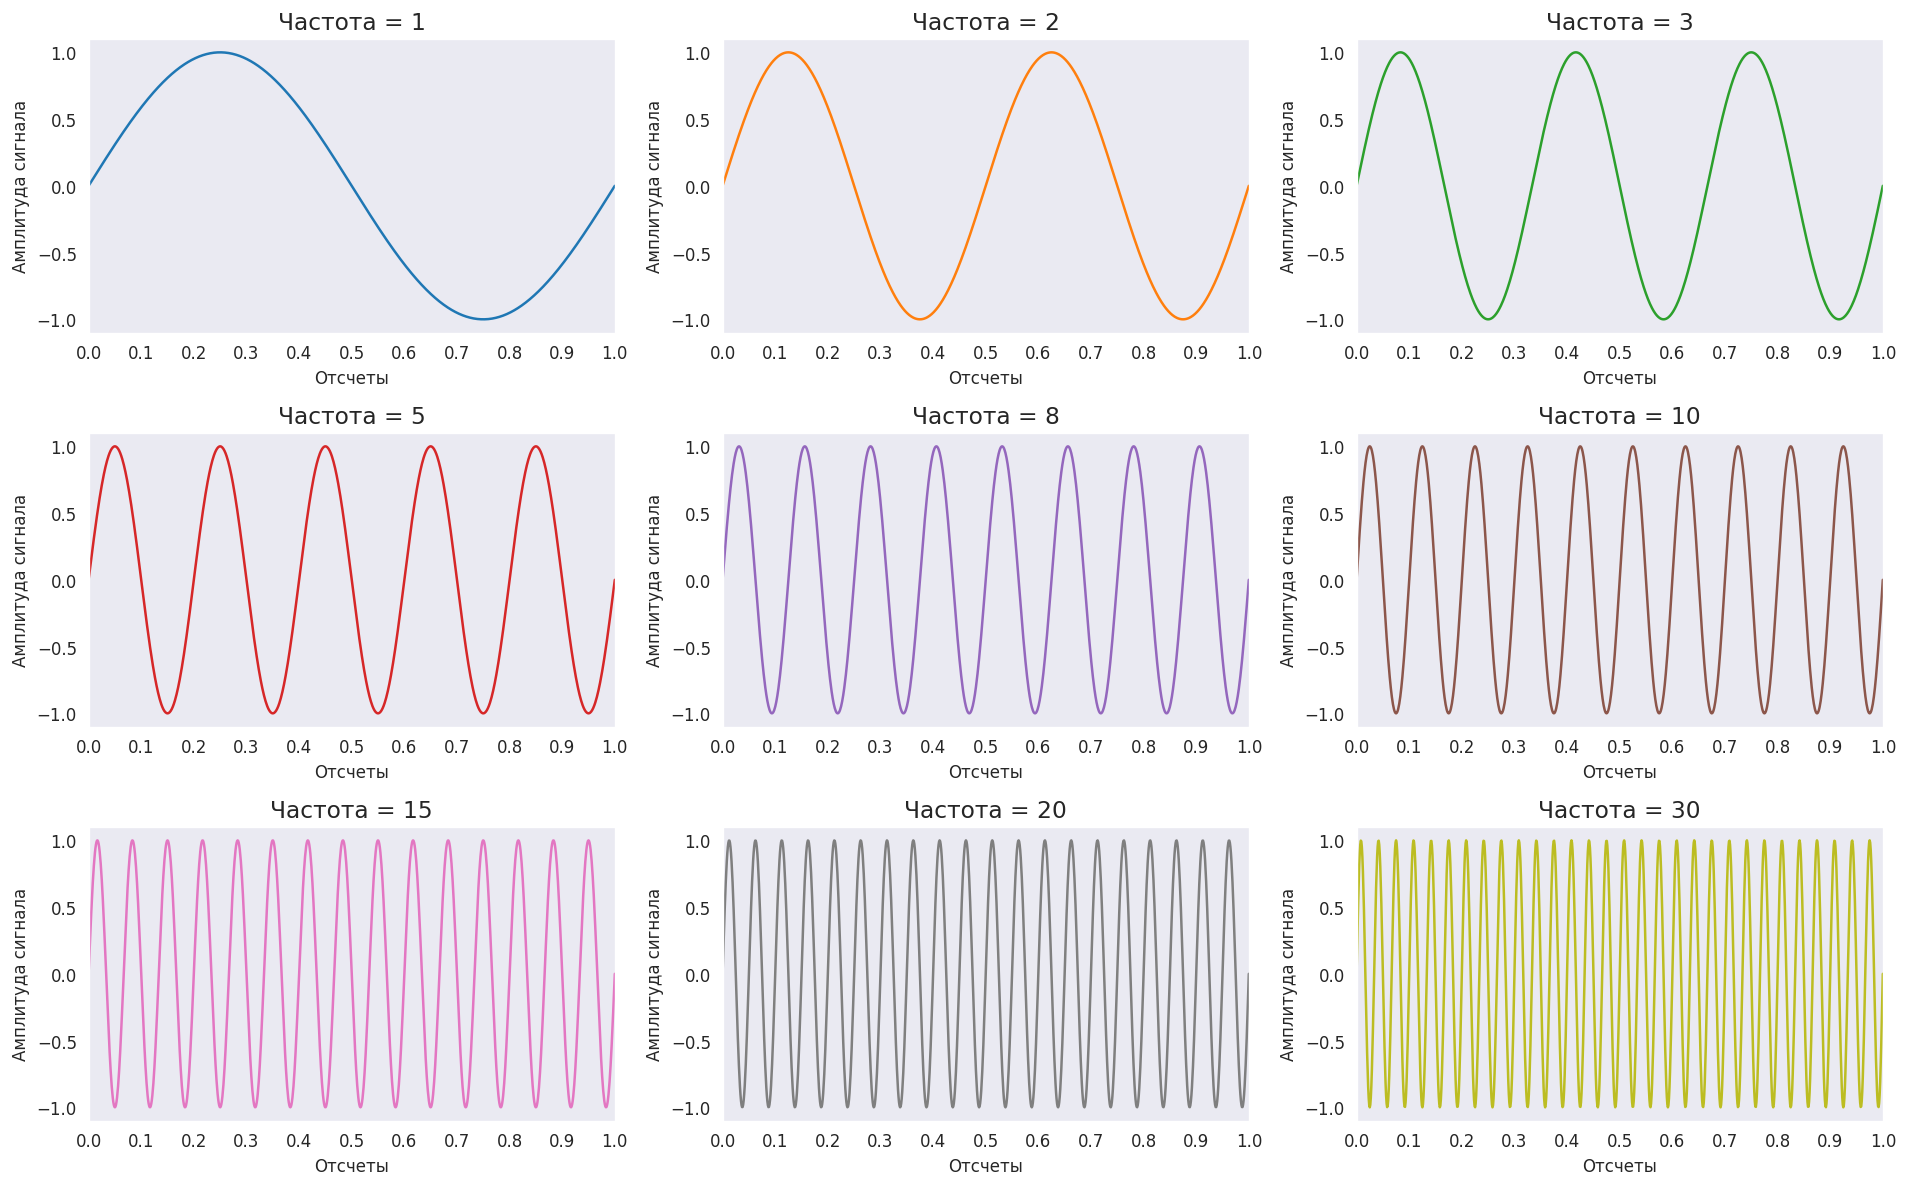

In [3]:
# зададим число точек реализации
n = 1000
t = np.linspace(0, 1, n, endpoint=True)

# зададим список частот
f_list = np.array([1, 2, 3, 5, 8, 10, 15, 20, 30])

plt.figure(figsize=(16, 10), dpi=120)
for i, freq in enumerate(f_list):
    plt.subplot(3, 3, i+1)
    plt.plot(t, np.sin(2*np.pi*freq*t), color=f"C{i}")
    plt.title(f'Частота = {freq}', fontsize=14)
    plt.xlabel('Отсчеты')
    plt.ylabel('Амплитуда сигнала')
    plt.xlim([0, 1])
    plt.xticks(np.linspace(0, 1, 11, endpoint=True))
    plt.grid()
plt.tight_layout()

## 1.3 Модуляция

Несмотря на то, что модуляция присуща аналоговым колебаниям, необходимо понимать, какими способами можно передавать информационные сообщения (для цифровых сигналов модуляция дискретными колебаниями называется **манипуляция**).

**Модуляцией** называется процесс изменения одного или нескольких параметров сигнала. Модулируемый сигнал называется "несущим" (на частоте этого сигнала передается модулируемое сообщение). Информационный сигнал называется модулирующим. Как правило, модулирующий сигнал - низкочастотный, а несущий сигнал - высокочастотный. В процессе модуляции несущего сигнала спектр модулирующего сигнала переносится в область несущей частоты. Гармонические сигналы можно модулировать во времени по амплитуде, частоте и фазе. 

Передача электромагнитного поля в пространстве выполняется с помощью антенн, размер которых зависит от длины волны $\lambda$, низкочастотные информационные сигналы во многих случаях просто физически невозможно передать  от источника к получателю (требуются антенны огромных размеров). В связи с этим применяются методы модуляции высокочастотных несущих колебаний. 

### 1.3.1 Амплитудная модуляция (АМ)

**Амплитудная модуляция** - широко известный способ изменения формы сигнала по параметру амплитуды. Из названия очевидно, что амплитуда такого сигнала изменяется во времени. Закон изменения амплитуды - произвольный, на практике часто используется модуляция гармоническим колебанием.

Формула простейшего гармонического АМ-сигнала:  

$s(t) = A_c \cdot (1 + m \cdot cos(\omega_mt +\phi)) \cdot cos(\omega_сt)$, 

где 
- $A_{c}$ – амплитуда несущего колебания, 
- $\omega_{c}$ – частота несущего сигнала, 
- $\omega_{m}$ – частота модулирующего (информационного) сигнала, 
- $\phi$ – начальная фаза модулирующего сигнала,
- *m* - коэффициент модуляции.

Тогда, радиосигнал состоит из несущего колебания и двух боковых полос. Из названия, очевидно, что несущая частота - та, на которой распространяется сигнал. Как правило, это высокая частота относительно модулирующей частоты.

Модулирующая частота, в свою очередь, низкочастотная. Это такая частота, на которой передается информационное сообщение.

Для синусоидального сигнала, использованного в качестве примера боковые полосы представляют собой синусоидальные сигналы и их частоты равны $\omega_{c}+\omega_{m}$ и $\omega_{c}-\omega_{m}$. Спектр АМ-сигнала всегда симметричен относительно центральной (несущей) частоты.

Важно понимать, что центральная частота не несет полезной информации, хоть и называется "несущая". В это понятие вкладывается значение частоты, относительно которого располагаются информационные (модулирующие) частоты сигнала. 

Создадим функцию АМ-сигнала:

In [4]:
def signal_am(amp=1.0, km=0.25, fc=10.0, fs=2.0, period=100):
    """
    Создание Амплитудно модулированного (АМ) сигнала

    Параметры сигнала:
    ----------
    amp : float
        Амплитуда сигнала
    km : float
    Коэффициент модуляции 0 <= km < 1
    fc : float
        Несущая частота
    fs : float
        Частота информационного сигнала сигнала
    period : integer
        Количество точек для сигнала (совпадает с периодом)
    """
    tt = 2.0 * np.pi * np.linspace(0, 1, period)
    return amp * (1 + km * np.cos(fs * tt)) * np.cos(fc * tt)

#### Варьирование **несущей частоты** $f_c$ АМ-сигнала

На приведенных ниже графиках показано, как меняется форма и спектр АМ-сигнала при изменении параметра **несущей частоты** $f_c$:

Как видно, спектр АМ-сигнала состоит из трех компонент: центральная - несущая, и две боковые - модулирующие. При изменении несущей частоты происходит смещение всего АМ-сигнала по частоте.

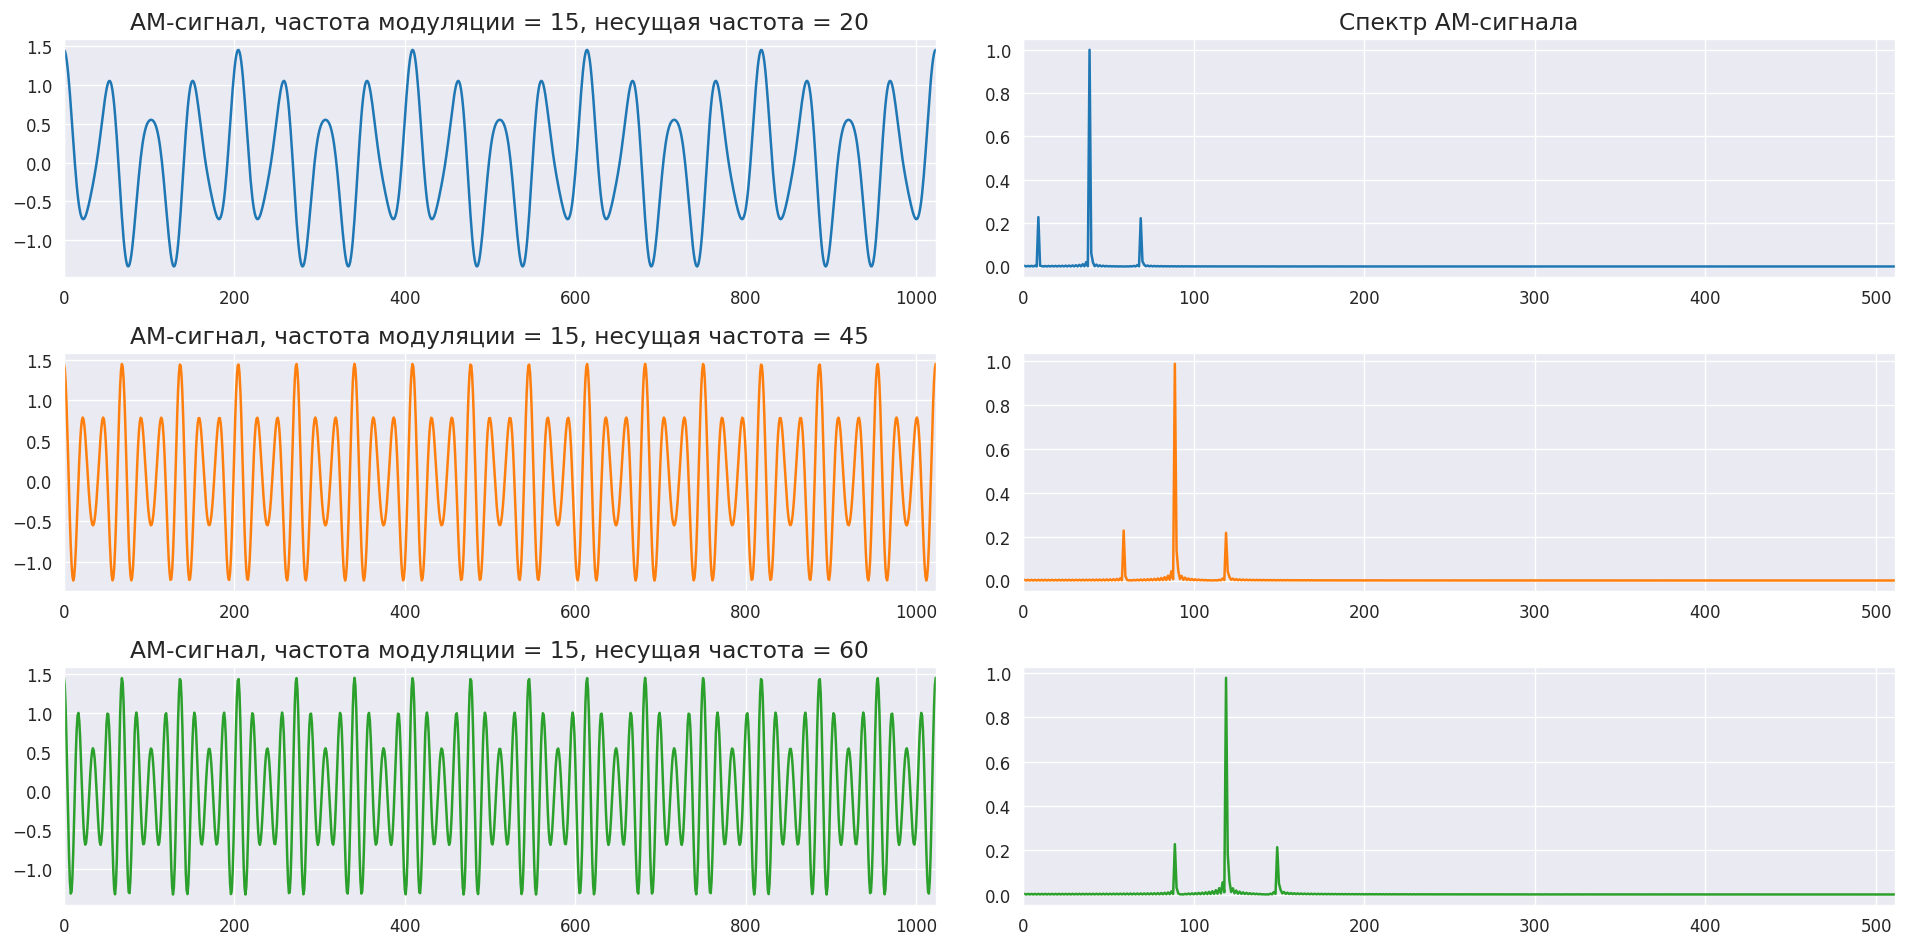

In [5]:
N = 1024

# параметры АМ-сигнала
fs = 15             # частота модуляции - частота информативного сигнала
fc = [20, 45, 60]   # список несущий частот

sig = [signal_am(amp=1.0, km=0.45, fc=i, fs=fs, period=N) for i in fc]

# вычисление спектра (FFT)
sft = np.abs(rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(16, 8), dpi=120)
for i, freq in enumerate(fc):
    plt.subplot(len(fc), 2, 2*i+1)
    plt.title(f'АМ-сигнал, частота модуляции = {fs}, несущая частота = {freq}', fontsize=14)
    plt.plot(sig[i], color=f"C{i}")
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(fc), 2, 2*i+2)
    if i == 0:
      plt.title('Спектр АМ-сигнала', fontsize=14)
    plt.plot(sft[i], color=f"C{i}")
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

#### Варьирование **частоты модулирующего колебания** $f_s$ АМ-сигнала

На приведенных ниже графиках показано, как меняется форма и спектр АМ-сигнала при изменении параметра **частоты модулирующего колебания** $f_s$:

Как видно, при изменении модулирующей частоты, спектр не сдвигается, но изменяется расстояние между центральной (несущей) частотой и боковыми (модулирующими) частотами. 

Ширина спектра АМ сигнала равна удвоенной частоте модулирующего сигнала.

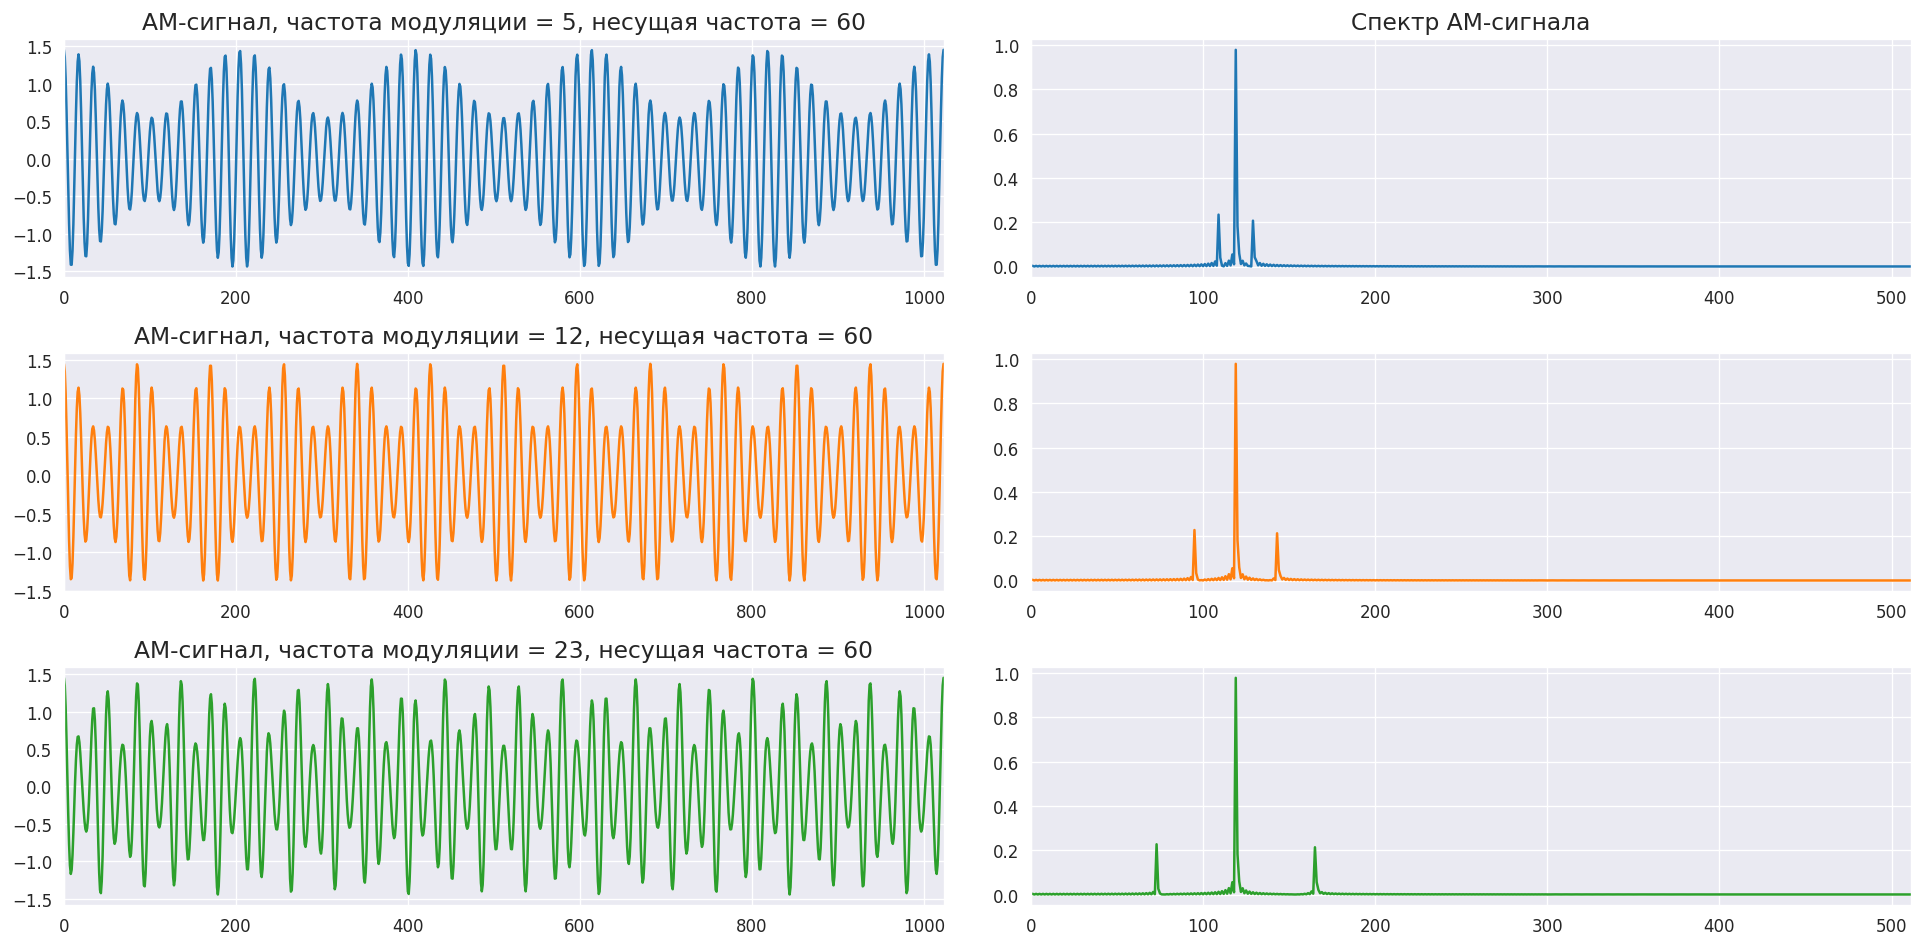

In [6]:
N = 1024

# параметры АМ-сигнала
fs = [5, 12, 23]    # список частот модуляции - список частот информативного сигнала
fc = 60             # несущая частота сигнала

sig = [signal_am(amp=1.0, km=0.45, fc=fc, fs=i, period=N) for i in fs]

# вычисление спектра (FFT)
sft = np.abs(rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(16, 8), dpi=120)
for i, freq in enumerate(fs):
    plt.subplot(len(fs), 2, 2*i+1)
    plt.title(f'АМ-сигнал, частота модуляции = {freq}, несущая частота = {fc}', fontsize=14)
    plt.plot(sig[i], color=f"C{i}")
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(fs), 2, 2*i+2)
    if i == 0:
      plt.title('Спектр АМ-сигнала', fontsize=14)
    plt.plot(sft[i], color=f"C{i}")
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

#### Варьирование **коэффициента модуляции** $k_m$ АМ-сигнала

Наконец, посмотрим, как меняется форма и спектр АМ-сигнала при изменении параметра **коэффициента модуляции** $k_m$:

Как видно, при изменении коэффициента модуляции, спектр сигнала остается на месте. Меняется только уровень боковых составляющих. Заметим, что при $k_m > 1$ возникает так называемая избыточная модуляция (перемодуляция). Максимальное значение коэффициента модуляции, при котором не возникает перемодуляции АМ-сигнала $k_m = 1$. 

Амплитуда центральной гармоники равна амплитуде несущего колебания: $A_c = A_o$. 

Амплитуда боковых составляющих равна $A_m = \frac{A_o\cdot m}{2}$

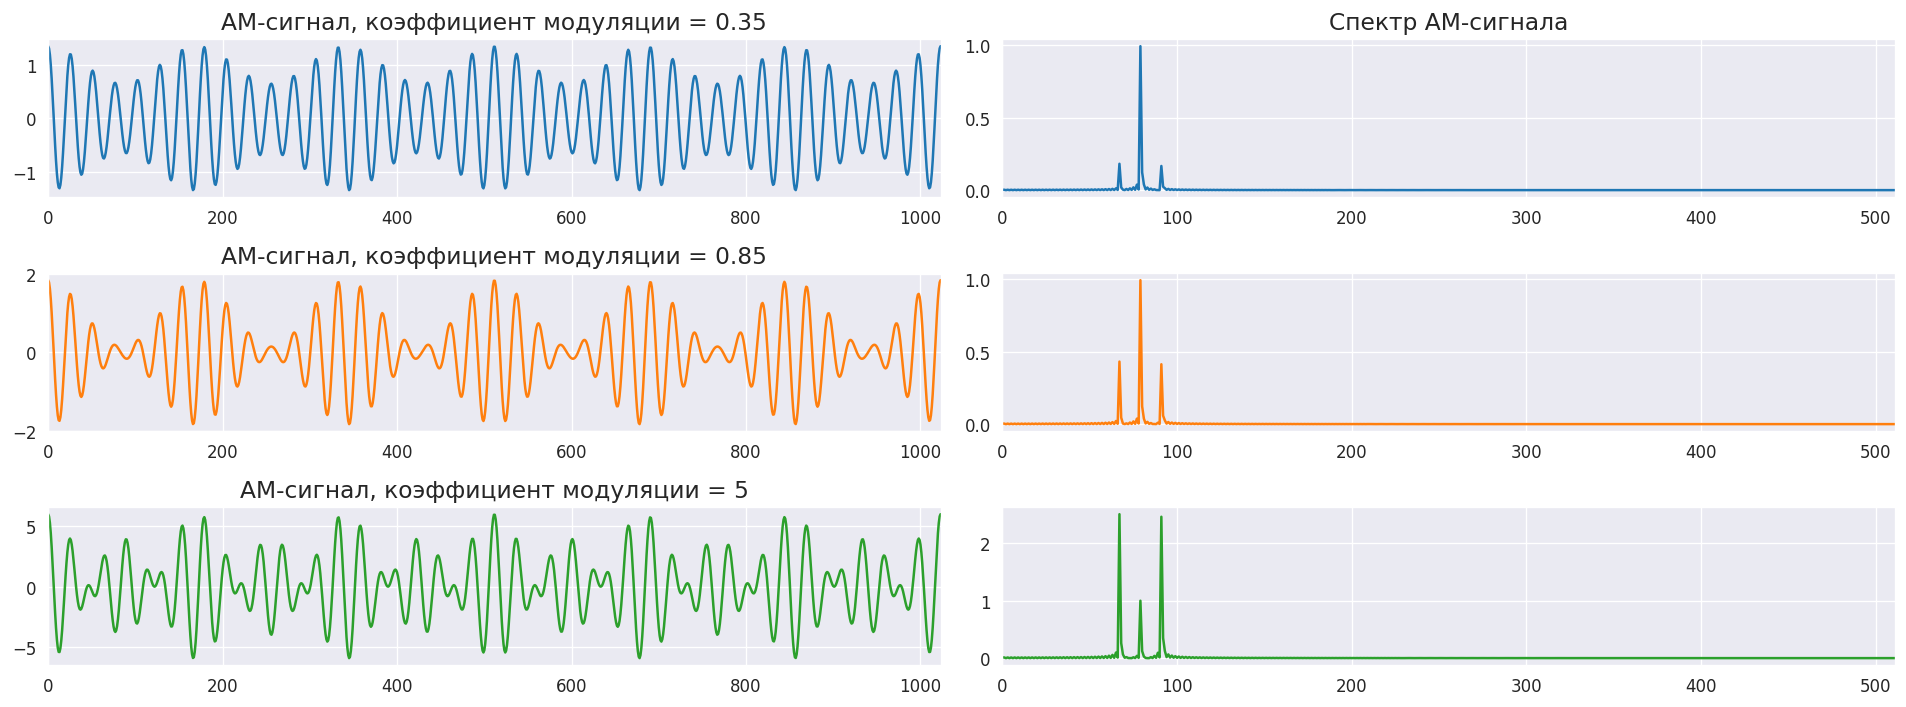

In [7]:
N = 1024

# параметры АМ-сигнала
fs = 6        # частота модуляции - частота информтивного сигнала          
fс = 40       # несущая частота сигнала          
km = [0.35, 0.85, 5]    # коэффициент модуляции

sig = [signal_am(amp=1.0, km=i, fc=fс, fs=fs, period=N) for i in km]

# вычисление спектра (FFT)
sft = np.abs(rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(16, 6), dpi=120)
for i, koeff in enumerate(km):
    plt.subplot(len(km), 2, 2*i+1)
    plt.title(f'АМ-сигнал, коэффициент модуляции = {koeff}', fontsize=14)
    plt.plot(sig[i], color=f"C{i}")
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(km), 2, 2*i+2)
    if i == 0:
        plt.title('Спектр АМ-сигнала', fontsize=14)
    plt.plot(sft[i], color=f"C{i}")
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

### 1.3.2 Угловая модуляция (УМ)

Под термином угловая модуляция понимается модуляция по фазе или по частоте (математически можно представить, что изменяется "угол" тригонометрической функции). Таким образом, сигналы с угловой модуляцией делятся на **частотно-модулированные** (ЧМ) сигналы и **фазо-модулированные** (ФМ) сигналы.

При фазовой модуляции значение угла фазы изменяется пропорционально информационному сообщению, при частотной модуляции информационный сигнал управляет частотой несущего колебания. В обоих случаях амплитуда сигнала остается неизменной.

Сигналы с угловой модуляцией применяются в музыкальных синтезаторах, в телевещании для передачи звука и сигнала цветности, а также для качественной передачи звуковых сообщений (например, радиовещание в УКВ диапазоне). Высокое качество в сравнении с АМ-сигналами достигается за счет лучшего использования частотного диапазона передаваемого сообщения. Иными словами, в полосе сигнала укладывается больше информации, чем в сигналах с АМ-модуляцией. Кроме того, информационное сообщение сигналов с угловой модуляцией менее подвержено серьёзному влиянию окружающей среды при передаче, поскольку информация содержится не в амплитуде. Очевидно, что в процессе распространения сигнал чаще претерпевает изменения амплитуды, чем изменения фазы или частоты.

Формула сигнала с угловой модуляцией:  

$s(t) = A \cdot cos(2\pi f_c t + k u_{m}(t)) $ 

В случае модуляции гармоническим колебанием: 

$s(t) =  A_c \cdot cos(2\pi f_c t + \frac{A_{m} f_{\Delta}}{f_{m}} sin(2\pi f_s t)) $, 

где 
- $A_{c}$ – амплитуда несущего колебания, 
- $A_{m}$ – амплитуда модулирующего колебания, 
- $f_{c}$ – частота несущего сигнала, 
- $f_{m}$ – частота модулирующего (информационного) сигнала, 
- $f_{\Delta}$ – девиация частоты.

В случае, когда информационный сигнал является дискретным, то говорят о фазовой манипуляции. Возможна относительная фазовая манипуляция (ОФМ), если информация передается не в самой фазе, а в разности фаз соседних сигналов в последовательности. Хотя для сокращения занимаемой полосы частот манипуляция может производится не прямоугольным, а сглаженным импульсом, например, колоколообразным, приподнятым косинусом и др., но и в этом случае обычно говорят о манипуляции.

По характеристикам фазовая модуляция близка к частотной модуляции. В случае синусоидального модулирующего (информационного) сигнала, результаты частотной и фазовой модуляции совпадают.

### 1.3.3 Частотная модуляция (ЧМ)

Отношение девиации частоты к частоте модулирующего колебания называют индексом частотной модуляции. Как и в случае с АМ-колебанием, модулирующая частота - низкочастотная относительно частоты несущей. 

Создадим упрощенную python-функцию ЧМ-сигнала:

- $A_{mp}$ – амплитуда колебания, 
- $f_{c}$ – частота несущего сигнала, 
- $f_{m}$ – частота модулирующего (информационного) сигнала, 
- $k_{d}$ – девиация частоты.

In [8]:
def signal_fm(amp=1.0, kd=0.25, fc=10.0, fs=2.0, period=100):
    """
    Создание Частотно модулированного (ЧМ) сигнала

    Параметры
    ----------
    amp : float
        Амплитуда сигнала
    kd : float
        Девиация частоты, kd < период/4,
        e.g. fc = 0, fs = 1, kd = 16
    fc : float
        Несущая частот
    fs : float
        Частота модулирующего (информационного) сигнала
    period : integer
        Количество точек для сигнала (совпадает с периодом)
    """
    tt = 2.0 * np.pi * np.linspace(0, 1, period)
    return amp * np.cos(fc * tt + kd/fs * np.sin(fs * tt))

#### Варьирование **девиации частоты** $k_d$ ЧМ-сигнала

Построим сигналы с частотной модуляцией в зависимости от значения девиации частоты:

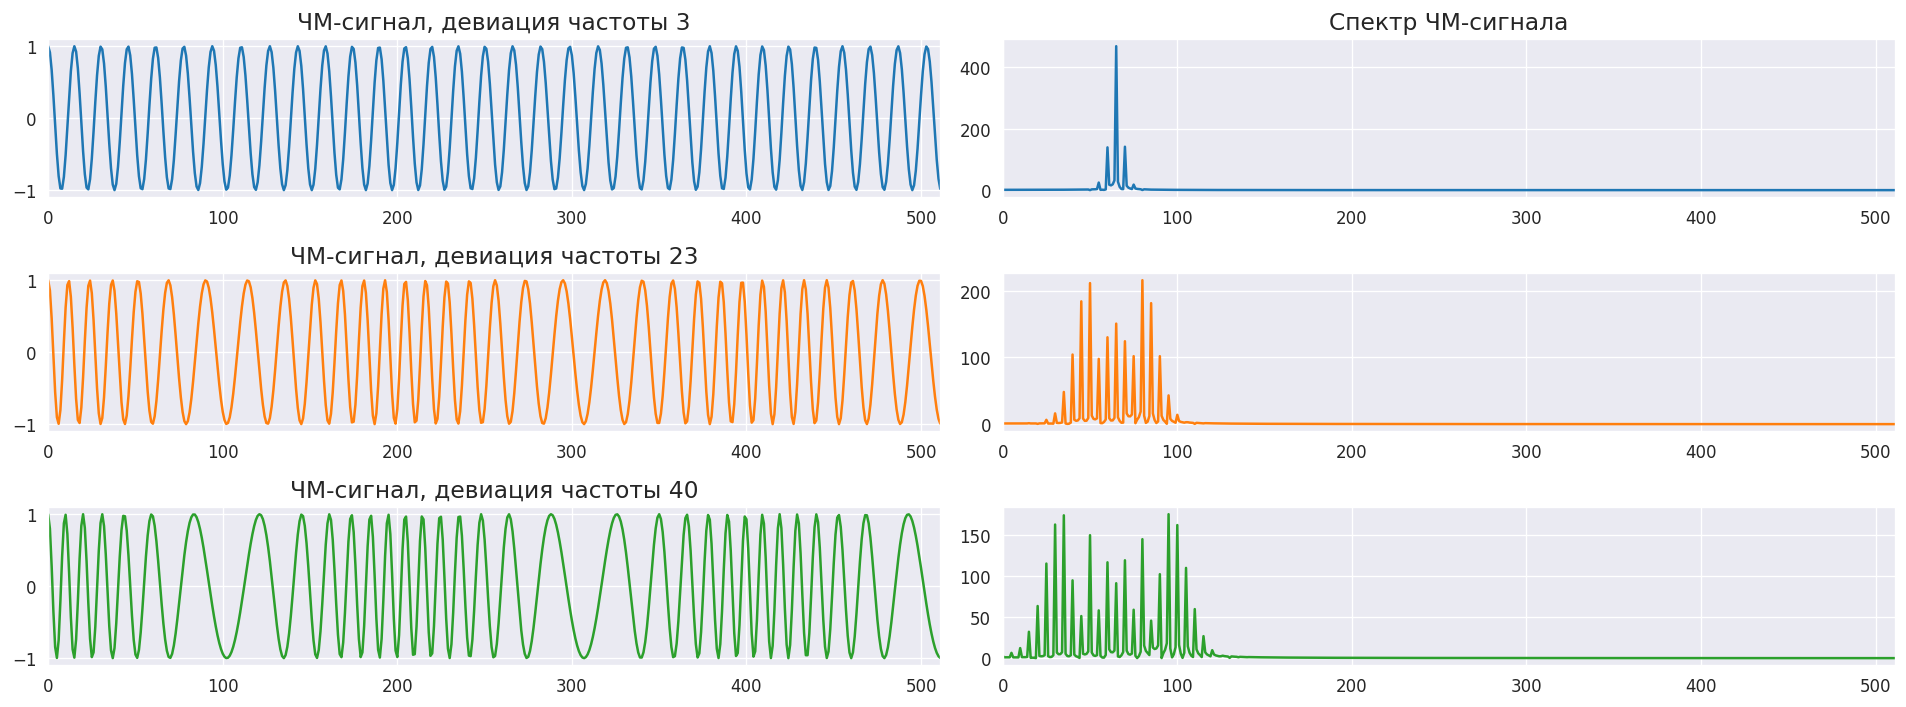

In [9]:
N = 1024
fs = 5            # частота модулирующего (информационного) сигнала
fс = 65           # несущая частота
kd = [3, 23, 40]  # коэффициент девиации частоты

sig = [signal_fm(amp=1.0, kd=i, fc=fс, fs=fs, period=N) for i in kd]

sft = np.abs(fft(sig, axis=1))

plt.figure(figsize=(16, 6), dpi=120)
for i, koeff in enumerate(kd):
    plt.subplot(len(kd), 2, 2*i+1)
    plt.title(f'ЧМ-сигнал, девиация частоты {koeff}', fontsize=14)
    plt.plot(sig[i], color=f"C{i}")
    plt.xlim([0, N//2-1])
    plt.grid(True)
    
    plt.subplot(len(kd), 2, 2*i+2)
    if i == 0:
        plt.title('Спектр ЧМ-сигнала', fontsize=14)
    plt.plot(sft[i], color=f"C{i}")
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

**Модулирующий и частотно-модулированный сигналы**

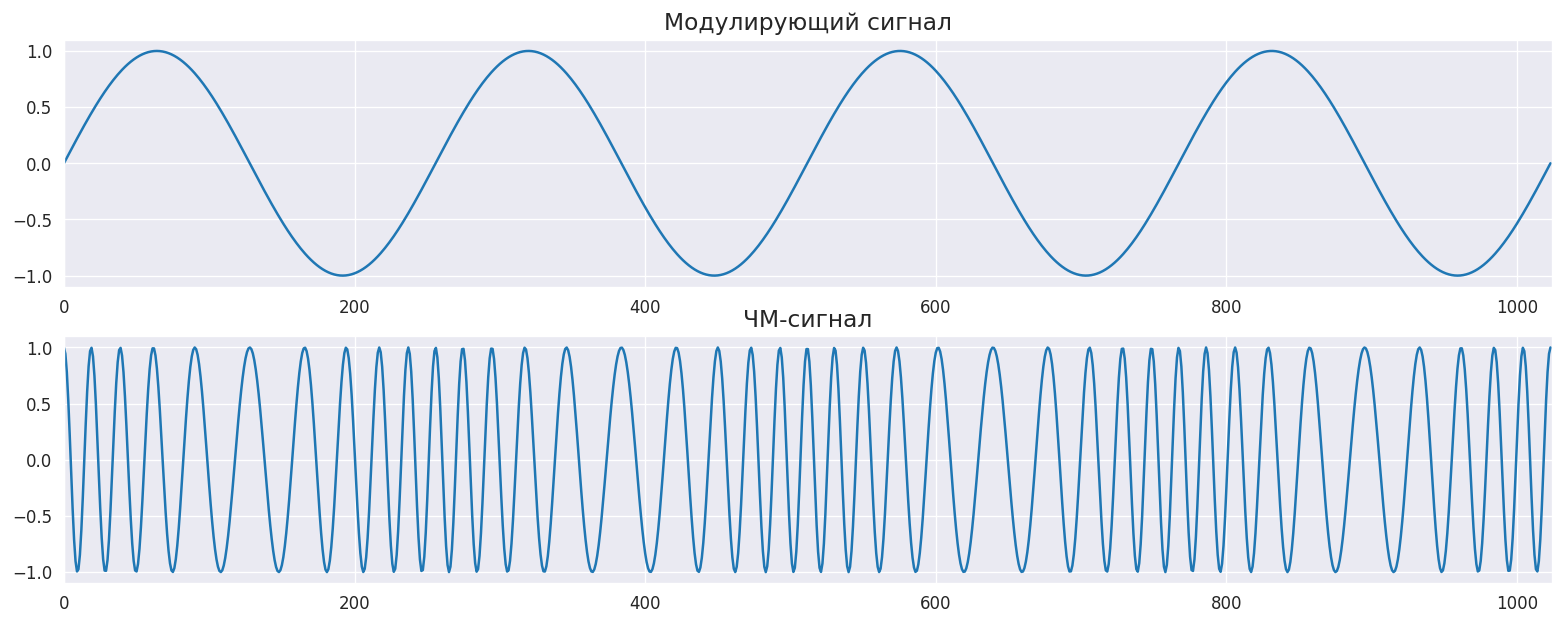

In [10]:
N = 1024
sig = signal_fm(amp=1.0, kd=15, fc=40, fs=4, period=N)
smd = np.sin(4 * 2.0 * np.pi * np.linspace(0, 1, N))
                
plt.figure(figsize=(16, 6), dpi=120)
plt.subplot(2, 1, 1)
plt.title('Модулирующий сигнал', fontsize=14)
plt.plot(smd)
plt.xlim([0, N])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('ЧМ-сигнал', fontsize=14)
plt.plot(sig)
plt.xlim([0, N])
plt.grid(True)

Как видно, чем больше девиация по частоте, тем шире спектр сигнала с угловой модуляцией.

### 1.3.4 Линейная частотная модуляция (ЛЧМ)

Сигналы с линейной частотной модуляцией (ЛЧМ) сигналы - это класс сигналов с частотной модуляцией, при которой частота несущего сигнала изменяется по линейному закону. 

В задачах радиолокации часто требуется получить заданную разрешающую способность по дальности, определяемую как минимальное расстояние между двумя целями, при которой дальность до каждой из целей определяется раздельно. Эта величина обратно пропорциональна ширине спектра сигнала. Следовательно необходимо увеличивать ширину спектра для уменьшения значения разрешающей способности.

Увеличение ширины спектра сигнала можно достичь с помощью уменьшения длительности сигнала. Но это в свою очередь приводит к уменьшению энергии сигнала и дальности обнаружения. Компромиссное решение - использование сигналов сложной формы, в частности - ЛЧМ-сигналов.

Функция изменения частоты линейна: 

$ f(t) = f_{0} + k t $ 

где:

- $ f_{0} = (F_{max} + F_{min}) / 2 $ - центральное значение несущей частоты.
- $ k = (F_{max}-F_{min}) / T_{c} $ - коэффициент модуляции
- $ T_c $ - длительность сигнала

Основное применение ЛЧМ-сигналов - задачи радиолокации. Широкополосные ЛЧМ сигналы позволяют обеспечить высокую разрешающую способность по дальности без уменьшения длительности посылаемых (зондируемых) импульсов.

Основное понятие ЛЧМ сигнала - это база сигнала, которая характеризуется произведением ширины спектра и длительности импульса сигнала. 

$ \beta = \Delta f \cdot \tau $

Если база ЛЧМ сигнала $ \beta >> 1 $, то его спектр стремится к прямоугольному виду, а фазовый спектр имеет квадратичную зависимость от частоты. Известно, что при прохождении через согласованный фильтр происходит сжатие ЛЧМ-сигнала. Это в свою очередь порождает узкий корреляционный пик большой амплитуды.  

Для сжатия ЛЧМ сигналов часто применяется операция быстрой свёртки, которая строится на базовых функциональных блоках цифровой обработки. Это ядра быстрого преобразования Фурье (БПФ), комплексные перемножители и блоки памяти, содержащие набор коэффициентов опорной функции.  

Как видно, базовые операции цифровой обработки применимы и к задачам радиолокации. 

ЛЧМ сигнал опишем формулой:

$ s(t) = A cos(2\pi f_{0}t + \pi\beta t^{2}) $ 

где

- $ A $ - амплитуда сигнала.
- $ f_{0} $ - начальное значение частоты,
- $ \beta $ - коэффициент ЛЧМ-модуляции,

Соответствующая функция на python:

In [11]:
def signal_chirp(amp=1.0, freq=0.0, beta=0.25, period=100, **kwargs):
    """
    Создание Линейно частотной модуляции (ЛЧМ)

    Параметры
    ----------
    amp : float
        Амплитуда сигнала
    beta : float
        Коэффициент ЛЧМ-модуляции: beta < N комплексное, beta < 0.5N действительное
    freq : float or int
        Начальное значение частоты
    period : integer
        Количество точек для сигнала (совпадает с периодом)
    kwargs : bool
        Сложный сигнал, если is_complex = True
        Модулируется полусинусоидальной волной, если is_modsine = True
    """
    is_complex = kwargs.get('is_complex', False)
    is_modsine = kwargs.get('is_modsine', False)

    t = np.linspace(0, 1, period)
    tt = np.pi * (freq * t + beta * t ** 2)
    
    if is_complex is True:
        res = amp * (np.cos(tt) + 1j * np.sin(tt))
    else:
        res = amp * np.cos(tt)

    if is_modsine is True:
        return res * np.sin(np.pi * t)
    return res

#### Варьирование **коэффициента ЛЧМ-модуляции** $\beta$ ЧМ-сигнала

Построим график ЛЧМ-сигнала для разных значений параметра $\beta$. 

Как видно, при увеличении параметра, расширяется спектр сигнала. 

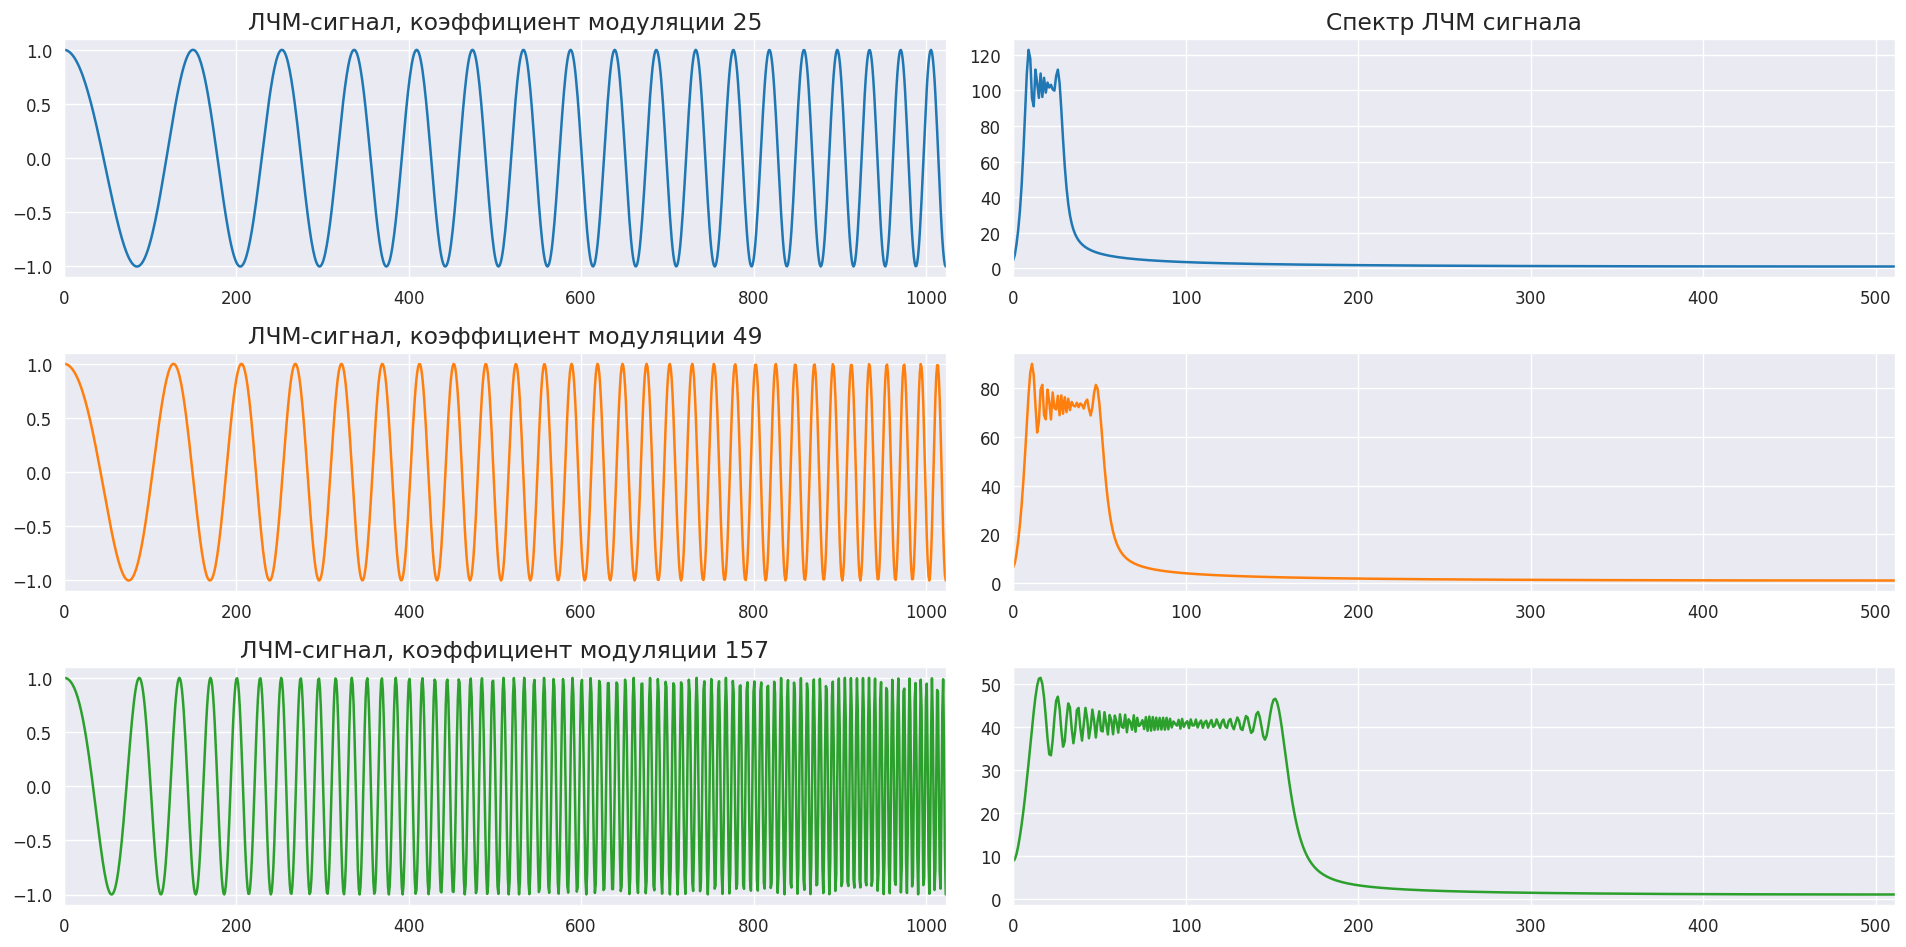

In [12]:
N = 1024
beta = [25, 49, 157]

schirp = [signal_chirp(amp=1, freq=10, beta=i, period=N) for i in beta]

sft = np.abs(fft(schirp, axis=1))

plt.figure(figsize=(16, 8), dpi=120)
for i, koeff in enumerate(beta):
    plt.subplot(len(beta), 2, 2*i+1)
    plt.title(f'ЛЧМ-сигнал, коэффициент модуляции {koeff}', fontsize=14)
    plt.plot(schirp[i], color=f"C{i}")
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(beta), 2, 2*i+2)
    if i == 0:
        plt.title('Спектр ЛЧМ сигнала', fontsize=14)
    plt.plot(sft[i], color=f"C{i}")
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

**Комплексный ЛЧМ-сигнал**

Зачастую ЛЧМ-импульсы дополнительно модулируются синусоидальной огибающей для достижения лучших спектральных характеристик. Также можно использовать комплексный ЛЧМ-сигнал.

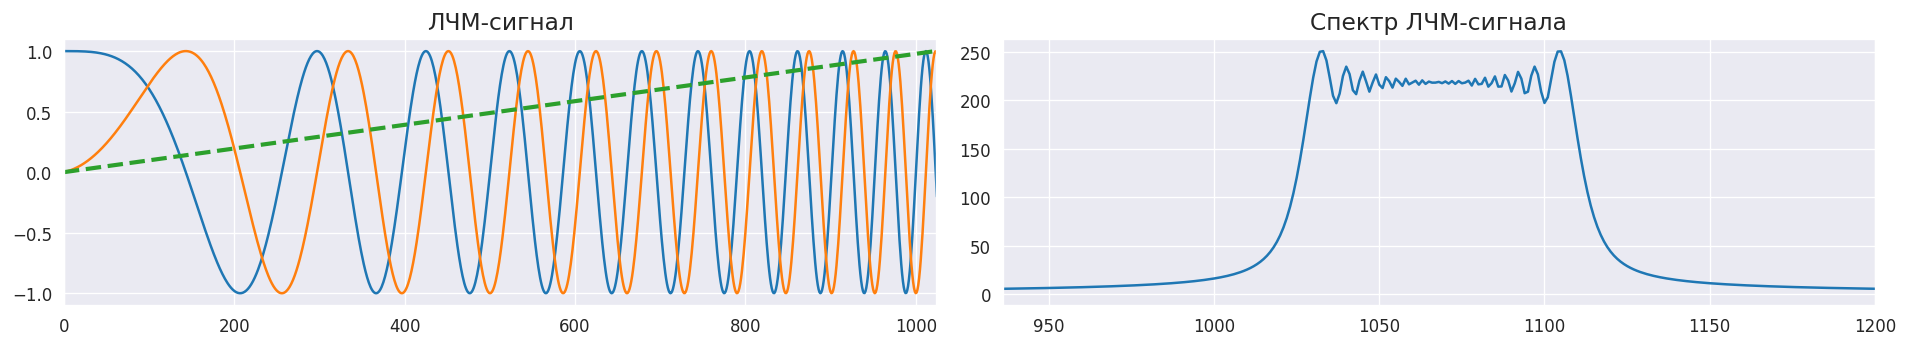

In [13]:
N = 2048
beta = 88

schirp = signal_chirp(amp=1, freq=1, beta=beta, period=N, is_complex=True)

sft = np.abs(fftshift(fft(schirp)))

plt.figure(figsize=(16, 3), dpi=120)
plt.subplot(1, 2, 1)
plt.title('ЛЧМ-сигнал', fontsize=14)
plt.plot(np.real(schirp))
plt.plot(np.imag(schirp))
plt.plot(np.linspace(0, 1, N//2), '--', linewidth='2.5')
plt.xlim([0, N//2])
plt.grid(True)
    
plt.subplot(1, 2, 2)
plt.title('Спектр ЛЧМ-сигнала', fontsize=14)
plt.plot(sft)
plt.xlim([N//2-beta, N//2+2*beta])
plt.grid(True)
plt.tight_layout()

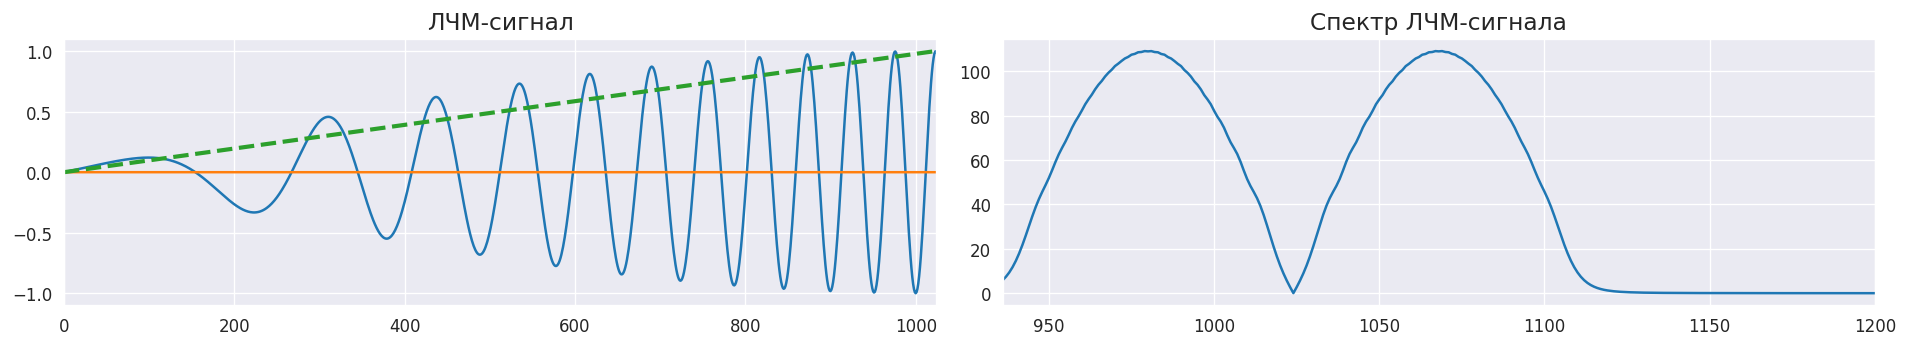

In [14]:
N = 2048
beta = 88

schirp = signal_chirp(amp=1, freq=0, beta=beta, period=N, is_modsine=True)

sft = np.abs(fftshift(fft(schirp)))

plt.figure(figsize=(16, 3), dpi=120)
plt.subplot(1, 2, 1)
plt.title('ЛЧМ-сигнал', fontsize=14)
plt.plot(np.real(schirp))
plt.plot(np.imag(schirp))
plt.plot(np.linspace(0, 1, N//2), '--', linewidth='2.5')
plt.xlim([0, N//2])
plt.grid(True)
    
plt.subplot(1, 2, 2)
plt.title('Спектр ЛЧМ-сигнала', fontsize=14)
plt.plot(sft)
plt.xlim([N//2-beta, N//2+2*beta])
plt.grid(True)
plt.tight_layout()